###### Setup:

In [8]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1.) Load Data

In [9]:
train_data = pd.read_csv('../../data/train.csv')
test_data = pd.read_csv('../../data/test.csv')

### 2.) Bird View

Let's take a peek at the top few rows:

In [10]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Let's explicitly set the `PassengerId` column as the index column:

In [11]:
train_data = train_data.set_index('PassengerId')
test_data = test_data.set_index('PassengerId')

Let's get more info from ***training data***; 
* How much data is missing?
* How many entries training data have?
* How many entries are there?

In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


**Data Dictionary:**
| Variable | Definition | Key | DType | E.G. |
| -------- | ---------- | --- | ----- | ---- |
| `Survived` | Survival **(TARGET)** | 0 = No, 1 = Yes | int | |
| `Pclass` | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd | int | |
| `Name` | Passengers name | | object | Braund, Mr. Owen Harris |
| `Sex` | Sex | 'male', 'female' | object | |
| `Age` | Age in years| | float | 35.0 | 177 |
| `SibSp` | # of siblings / spouses aboard the Titanic | | int | 1 |
| `Parch` | # of parents / children aboard the Titanic | | int | 1 |
| `Ticket` | Ticket number | | object | PC 17599 |
| `Fare` | Passenger fare | | float | 71.2833 |
| `Cabin` | Cabin number | object | C85 |
| `Embarked` | Port of Embarkation | C = Cherbourg,<br> Q = Queenstown,<br> S = Southampton | object |

**Variable Notes:**
* `Pclass`: A proxy for socio-economic status (SES)
  * 1st = Upper
  * 2nd = Middle
  * 3rd = Lower
* `Age`: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
* `Sibsp`: The dataset defines family relations in this way...
  * Sibling = brother, sister, stepbrother, stepsister
  * Spouse = husband, wife (mistresses and fiancés were ignored)
* `Parch`: The dataset defines family relations in this way...
  * Parent = mother, father
  * Child = daughter, son, stepdaughter, stepson
  * Some children travelled only with a nanny, therefore parch=0 for them.

**Notes:**
* NaN Value Count from training Data:
  * `Age` - 177
  * `Cabin` - 687
  * `Embarked` - 2

---

In [6]:
X_train = train_data.drop('Survived', axis=1)
y_train = train_data['Survived'].copy()

This dataset comes from Kaggle and I'm trusting for that, and same time I wanna look at is it biased or not

In [36]:
survived_counts = y_train.value_counts()

print(f'Number of survivors : {survived_counts[1]}')
print(f'Number of deaths: {survived_counts[0]}')

Number of survivors : 342
Number of deaths: 549


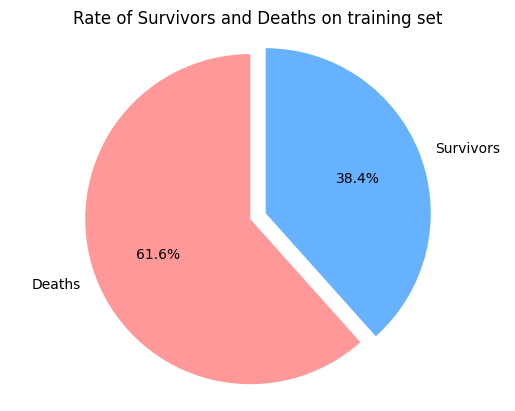

In [37]:
plt.pie(survived_counts,
        labels=["Deaths", "Survivors"],
        autopct='%1.1f%%',
        colors=['#FF9999', '#66B2FF'],
        startangle=90,
        explode=(0, 0.1))

plt.title("Rate of Survivors and Deaths on training set")
plt.axis('equal')
plt.show()

No obvious imbalance, and that's good for training model later. 

I wanna try **Oversampling** though:

In [38]:
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=42)

# Oversampling the train set to eliminate the imbalance between survivors and fatalities
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)


In [39]:
survived_counts_resampled = y_train_resampled.value_counts()

print(f'Number of survivors : {survived_counts_resampled[1]}')
print(f'Number of deaths: {survived_counts_resampled[0]}')

Number of survivors : 549
Number of deaths: 549


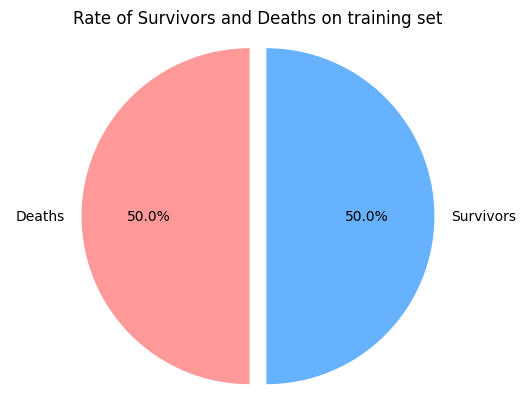

In [40]:
plt.pie(survived_counts_resampled,
        labels=["Deaths", "Survivors"],
        autopct='%1.1f%%',
        colors=['#FF9999', '#66B2FF'],
        startangle=90,
        explode=(0, 0.1))

plt.title("Rate of Survivors and Deaths on training set")
plt.axis('equal')
plt.show()

Default training set isn't bad but we tried to use oversampling method for increasing death number (I feel bad for it). Now future model can be better but we will test with default and resampled versions of training data, don't worry